<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-10-02 16:53:12--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-10-02 16:53:12--  https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-10-02 16:53:13--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.git

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# from 18

## 18-1

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
import numpy as np

## 18-24

In [ ]:
G = nx.Graph()
G.add_edge(0, 1)
G[0][1]['travel_time'] = 20

## 18-25

In [ ]:
for i, j in [(0, 1), (1, 0)]:
    travel_time = G[i][j]['travel_time']
    print(f"마을 {i} => 마을 {j})로의 이동 시간은 {travel_time}분 걸립니다")

마을 0 => 마을 1)로의 이동 시간은 20분 걸립니다
마을 1 => 마을 0)로의 이동 시간은 20분 걸립니다


## 18-26

In [ ]:
np.random.seed(0)
G.add_edge(1, 2, travel_time=15)

## 18-27

In [ ]:
travel_time = sum(G[i][1]['travel_time'] for i in [0, 2])

## 18-28

In [ ]:
G = nx.Graph()
G.add_nodes_from((i, {'county_id': 0}) for i in range(5))

## 18-29

In [ ]:
import numpy as np
np.random.seed(0)

def add_random_edge(G, node1, node2, prob_road=0.9, mean_drive_time=20):
    if np.random.binomial(1, prob_road):
        drive_time = np.random.normal(mean_drive_time)
        G.add_edge(node1, node2, travel_time=round(drive_time, 2))

nodes = list(G.nodes())
for node1 in nodes[:-1]:
    for node2 in nodes[node1 + 1:]:
        add_random_edge(G, node1, node2)

## 18-30

In [ ]:
np.random.seed(0)
def random_county(county_id):
    numTowns = np.random.randint(3, 10)
    G = nx.Graph()
    nodes = [(node_id, {'county_id': county_id}) for node_id in range(numTowns)]
    G.add_nodes_from(nodes)
    for node1, _ in nodes[:-1]:
        for node2, _ in nodes[node1 + 1:]:
            add_random_edge(G, node1, node2)
    return G

G2 = random_county(1)


## 18-31

In [ ]:
np.random.seed(0)
G = nx.disjoint_union(G, G2)

## 18-32

In [ ]:
np.random.seed(0)
def add_intercounty_edges(G):
    nodes = list(G.nodes(data=True))
    for node1, attributes1 in nodes[:-1]:
        county1 = attributes1['county_id']
        for node2, attributes2 in nodes[node1:]:
            if county1 != attributes2['county_id']:
                add_random_edge(G, node1, node2,
                                  prob_road=0.05, mean_drive_time=45)
    return G

G = add_intercounty_edges(G)

## 18-33

In [ ]:
np.random.seed(1)
G = random_county(0)
for county_id in range(1, 6):
    G2 = random_county(county_id)
    G = nx.disjoint_union(G, G2)

G = add_intercounty_edges(G)
np.random.seed(1)


## 18-34

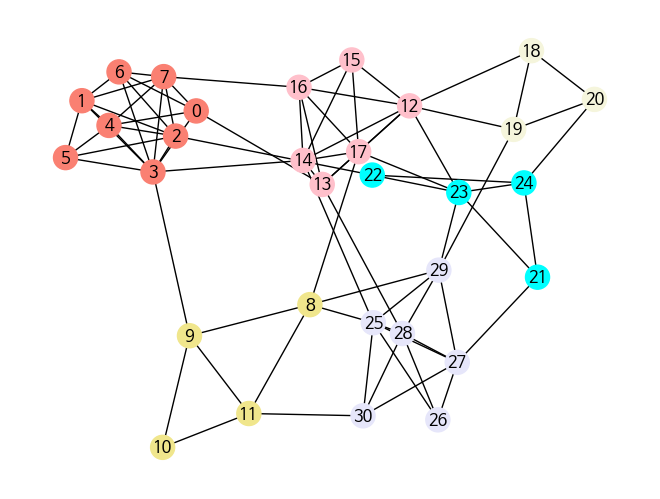

In [ ]:
np.random.seed(1)
county_colors = ['salmon', 'khaki', 'pink', 'beige', 'cyan', 'lavender']
county_ids = [G.nodes[n]['county_id'] for n in G.nodes]
node_colors = [county_colors[id_] for id_ in county_ids]
nx.draw(G, with_labels=True, node_color=node_colors, font_family='NanumGothic')
plt.show()

# 19

## 19-1

In [ ]:
adjacency_matrix = nx.to_numpy_array(G)
degree_town_0 = adjacency_matrix[:,0].sum()
assert degree_town_0 == len(G[0])
assert degree_town_0 == G.degree(0)
print(f"마을 0은 {degree_town_0:.0f}개의 도로와 연결되어 있습니다")

마을 0은 5개의 도로와 연결되어 있습니다


## 19-2

9개의 도로와 연결된 마을 3이 가장 중심에 있습니다


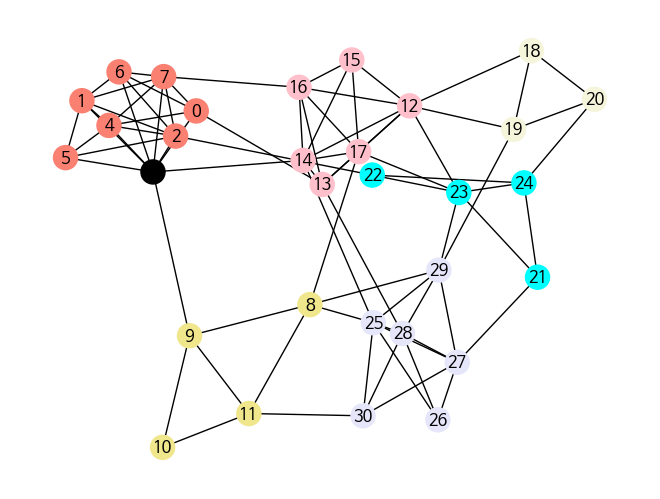

In [ ]:
np.random.seed(1)
central_town = adjacency_matrix.sum(axis=0).argmax()
degree = G.degree(central_town)
print(f"{degree}개의 도로와 연결된 마을 {central_town}이 가장 중심에 있습니다")
node_colors[central_town] = 'k'
nx.draw(G, with_labels=True, node_color=node_colors, font_family='NanumGothic')
plt.show()

## 19-3

In [ ]:
second_town = sorted(G.nodes, key=lambda x: G.degree(x), reverse=True)[1]
second_degree = G.degree(second_town)
print(f"마을 {second_town}은 {second_degree}개의 도로와 연결되어 있습니다")

마을 12은 8개의 도로와 연결되어 있습니다


## 19-4

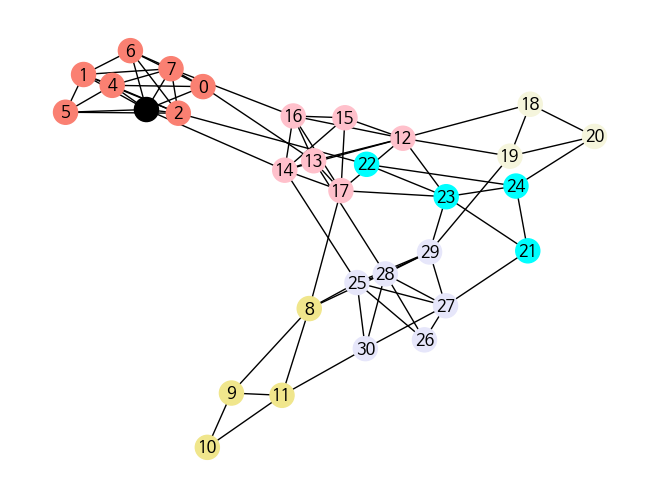

In [ ]:
np.random.seed(1)
G.remove_edge(3, 9)
assert G.degree(3) == G.degree(12)
nx.draw(G, with_labels=True, node_color=node_colors, font_family='NanumGothic')
plt.show()

## 19-5

In [ ]:
np.random.seed(0)
def random_drive(num_stops=10):
    town = np.random.choice(G.nodes)
    for _ in range(num_stops):
        town = np.random.choice(G[town])

    return town

destination = random_drive()
print(f"임의 주행 후 자동차는 마을 {destination}에 도달했습니다")

임의 주행 후 자동차는 마을 24에 도달했습니다


## 19-6

In [ ]:
import time
np.random.seed(0)
car_counts = np.zeros(len(G.nodes))
num_cars = 20000

start_time = time.time()
for _ in range(num_cars):
    destination = random_drive()
    car_counts[destination] += 1

central_town = car_counts.argmax()
traffic = car_counts[central_town]
running_time = time.time() - start_time
print(f"시뮬레이션은 {running_time:.2f} 초 동안 진행되었습니다")
print(f"마을 {central_town}의 교통량이 가장 많습니다")
print(f"해당 마을에 도착한 차량은 {traffic:.0f}대 입니다")

시뮬레이션은 5.38 초 동안 진행되었습니다
마을 12의 교통량이 가장 많습니다
해당 마을에 도착한 차량은 1015대 입니다


## 19-7

In [ ]:
print(f"마을 3에 {car_counts[3]:.0f} 대의 차량이 있습니다.")

마을 3에 934 대의 차량이 있습니다.


## 19-8

In [ ]:
probabilities = car_counts / num_cars
for i in [12, 3]:
    prob = probabilities[i]
    print(f"마을 {i}에 도달할 확률은 {prob:.3f} 입니다.")

마을 12에 도달할 확률은 0.051 입니다.
마을 3에 도달할 확률은 0.047 입니다.


## 19-9

In [ ]:
num_neighbors = G.degree(0)
prob_travel = 1 / num_neighbors
print(f"마을 0에서 이웃 마울 {G.degree(0)}곳 중 하나로 "
     f"이동할 확률은 {prob_travel} 입니다")

마을 0에서 이웃 마울 5곳 중 하나로 이동할 확률은 0.2 입니다


## 19-10

In [ ]:
transition_vector = np.array([0.2 if i in G[0] else 0 for i in G.nodes])

adjacency_matrix = nx.to_numpy_array(G)

v2 = np.array([1 if i in G[0] else 0 for i in G.nodes]) * 0.2
v3 = adjacency_matrix[:,0] * 0.2
v4 = adjacency_matrix[:,0] / adjacency_matrix[:,0].sum()

for v in [v2, v3, v4]:
    assert np.array_equal(transition_vector, v)
    print(transition_vector)

[0.  0.  0.  0.2 0.2 0.  0.2 0.2 0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.  0.  0.2 0.2 0.  0.2 0.2 0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.  0.  0.2 0.2 0.  0.2 0.2 0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


## 19-11

In [ ]:
transition_matrix = adjacency_matrix / adjacency_matrix.sum(axis=0)
assert np.array_equal(transition_vector, transition_matrix[:,0])

## 19-12

In [ ]:
v = np.ones(31) / 31
for _ in range(10):
    v = transition_matrix @ v

for i in [12, 3]:
    print(f"마을 {i}에 들릴 확률은 {v[i]:.3f} 입니다")

마을 12에 들릴 확률은 0.051 입니다
마을 3에 들릴 확률은 0.047 입니다


## 19-13

In [ ]:
prob = transition_matrix[0][3] / 31
print(f"마을 3에서 시작해 마을 0으로 이동할 확률은 {prob:.2}입니다")

마을 3에서 시작해 마을 0으로 이동할 확률은 0.004입니다


## 19-14

In [ ]:
for i in range(31):
    prob = transition_matrix[0][i] / 31
    if not prob:
        continue

    print(f"마을 i에서 시작해 마을 0으로 이동할 확률은 {prob:.2}입니다")

마을 i에서 시작해 마을 0으로 이동할 확률은 0.004입니다
마을 i에서 시작해 마을 0으로 이동할 확률은 0.0054입니다
마을 i에서 시작해 마을 0으로 이동할 확률은 0.0065입니다
마을 i에서 시작해 마을 0으로 이동할 확률은 0.0046입니다
마을 i에서 시작해 마을 0으로 이동할 확률은 0.0054입니다


## 19-15

In [ ]:
np.random.seed(0)
prob = sum(transition_matrix[0][i] / 31 for i in range(31))
frequency = np.mean([random_drive(num_stops=1) == 0 for _ in range(50000)])

print(f"마을 0이 첫 번째 정거장이 될 확률은 {prob:.3f}입니다")
print(f"마을 0이 첫 번째 정거장이 될 빈도는 {frequency:.3f}입니다")

마을 0이 첫 번째 정거장이 될 확률은 0.026입니다
마을 0이 첫 번째 정거장이 될 빈도는 0.026입니다


## 19-16

In [ ]:
v = np.ones(31) / 31
assert transition_matrix[0] @ v == prob

## 19-17

In [ ]:
np.random.seed(0)
stop_1_probabilities = transition_matrix @ v
prob = stop_1_probabilities[12]
frequency = np.mean([random_drive(num_stops=1) == 12 for _ in range(50000)])

print('첫 번째 정거장이 될 확률')
print(np.round(stop_1_probabilities, 3))
print(f"\n마을 12가 첫 번째 정거장이 될 확률은 {prob:.3f}입니다")
print(f"마을 12가 첫 번째 정거장이 될 빈도는 {frequency:.3f}입니다")

첫 번째 정거장이 될 확률
[0.026 0.033 0.045 0.046 0.033 0.019 0.025 0.038 0.033 0.031 0.019 0.041
 0.052 0.03  0.036 0.019 0.031 0.039 0.023 0.031 0.027 0.019 0.018 0.044
 0.038 0.046 0.015 0.045 0.04  0.035 0.023]

마을 12가 첫 번째 정거장이 될 확률은 0.052입니다
마을 12가 첫 번째 정거장이 될 빈도는 0.052입니다


## 19-18

In [ ]:
np.random.seed(0)
stop_2_probabilities = transition_matrix @ transition_matrix @ v
prob = stop_2_probabilities[12]
frequency = np.mean([random_drive(num_stops=2) == 12 for _ in range(50000)])

print('두 번째 정거장이 될 확률')
print(np.round(stop_2_probabilities, 3))
print(f"\n마을 12가 두 번째 정거장이 될 확률은 {prob:.3f}입니다")
print(f"마을 12가 두 번째 정거장이 될 빈도는 {frequency:.3f}입니다")

두 번째 정거장이 될 확률
[0.027 0.033 0.038 0.043 0.033 0.023 0.028 0.039 0.039 0.026 0.021 0.032
 0.048 0.034 0.039 0.023 0.032 0.041 0.023 0.029 0.025 0.024 0.023 0.04
 0.029 0.043 0.021 0.036 0.036 0.042 0.031]

마을 12가 두 번째 정거장이 될 확률은 0.048입니다
마을 12가 두 번째 정거장이 될 빈도는 0.048입니다


## 19-19

In [ ]:
def compute_stop_likelihoods(M, num_stops):
    v = np.ones(M.shape[0]) / M.shape[0]
    for _ in range(num_stops):
        v = M @ v

    return v

stop_10_probabilities = compute_stop_likelihoods(transition_matrix, 10)
prob = stop_10_probabilities[12]

print('열 번째 정거장이 될 확률')
print(np.round(stop_10_probabilities, 3))
print(f"\n마을 12가 열 번째 정거장이 될 확률은 {prob:.3f}입니다")

열 번째 정거장이 될 확률
[0.029 0.035 0.041 0.047 0.035 0.023 0.029 0.041 0.034 0.021 0.014 0.028
 0.051 0.038 0.044 0.025 0.037 0.045 0.02  0.026 0.02  0.02  0.019 0.039
 0.026 0.047 0.02  0.04  0.04  0.04  0.027]

마을 12가 열 번째 정거장이 될 확률은 0.051입니다


## 19-20

In [ ]:
centrality = nx.pagerank(G)[12]
print(f"마을 12에 대한 페이지랭크 중심성은 {centrality:.3f}입니다")

마을 12에 대한 페이지랭크 중심성은 0.048입니다


## 19-21

In [ ]:
new_matrix = 0.85 * transition_matrix + 0.15 / 31
stop_10_probabilities = compute_stop_likelihoods(new_matrix, 10)

prob = stop_10_probabilities[12]
print(f"마을 12에 도달할 확률은 {prob:.3f}입니다")

마을 12에 도달할 확률은 0.048입니다


## 19-22

In [ ]:
prob = compute_stop_likelihoods(new_matrix, 1000)[12]
print(f"마을 12에 도달할 확률은 {prob:.3f}입니다")

마을 12에 도달할 확률은 0.048입니다


## 19-23

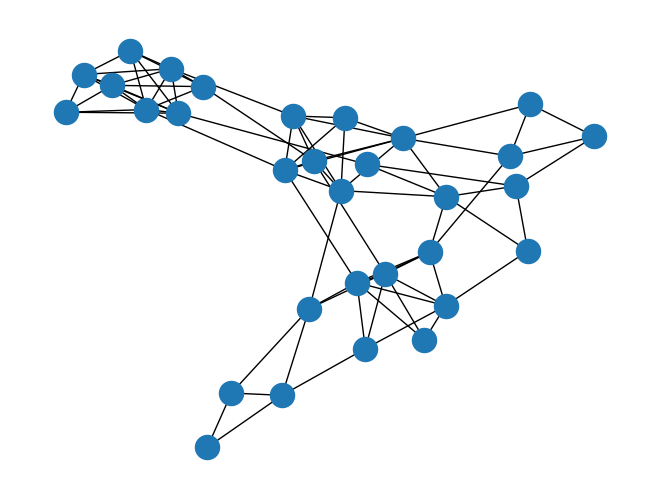

In [ ]:
np.random.seed(1)
nx.draw(G)
plt.show()

## 19-24

In [ ]:
np.random.seed(0)
flow_matrix = transition_matrix @ transition_matrix

simulated_flow_matrix = np.zeros((31, 31))
num_simulations = 10000
for town_i in range(31):
    for _ in range(num_simulations):
        town_j = np.random.choice(G[town_i])
        town_k = np.random.choice(G[town_j])

simulated_flow_matrix[town_k][town_i] += 1
simulated_flow_matrix /= num_simulations
# assert np.allclose(flow_matrix, simulated_flow_matrix, atol=1e-2)

## 19-25

지역내 평균 흐름: 0.116
지역간 평균 흐름: 0.042
최소 지역내 흐름은 약 0.042 입니다
132 개의 지역간 흐름이 임계값 안에 속합니다


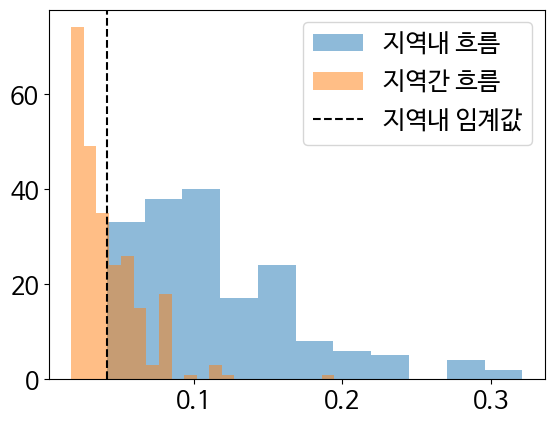

In [ ]:
def compare_flow_distributions():
    county_flows = []
    between_county_flows = []
    for i in range(31):
        county = G.nodes[i]['county_id']
        nonzero_indices = np.nonzero(flow_matrix[:,i])[0]
        for j in nonzero_indices:
            flow = flow_matrix[j][i]

            if county == G.nodes[j]['county_id']:
                county_flows.append(flow)
            else:
                between_county_flows.append(flow)

    mean_intra_flow = np.mean(county_flows)
    mean_inter_flow = np.mean(between_county_flows)
    print(f"지역내 평균 흐름: {mean_intra_flow:.3f}")
    print(f"지역간 평균 흐름: {mean_inter_flow:.3f}")

    threshold = min(county_flows)
    num_below = len([flow for flow in between_county_flows if flow < threshold])
    print(f"최소 지역내 흐름은 약 {threshold:.3f} 입니다")
    print(f"{num_below} 개의 지역간 흐름이 임계값 안에 속합니다")

    plt.hist(county_flows, bins='auto', alpha=0.5, label='지역내 흐름')
    plt.hist(between_county_flows, bins='auto', alpha=0.5, label='지역간 흐름')
    plt.axvline(threshold, linestyle='--', color='k', label='지역내 임계값')
    plt.legend()
    plt.show()

compare_flow_distributions()

## 19-26

In [ ]:
num_below = np.count_nonzero((flow_matrix > 0.0) & (flow_matrix < 0.01))
print(f"{num_below}개의 지역 내 흐름이 0.01 임계 지점 이하에 속합니다")

0개의 지역 내 흐름이 0.01 임계 지점 이하에 속합니다


## 19-27

In [ ]:
v = np.array([0.7, 0.3])
v2 = v ** 2
v2 /= v2.sum()
assert v.mean() == round(v2.mean(), 10)
assert v2[0] > v[0]
assert v2[1] < v[1]

## 19-28

지역내 평균 흐름: 0.146
지역간 평균 흐름: 0.020
최소 지역내 흐름은 약 0.012 입니다
118 개의 지역간 흐름이 임계값 안에 속합니다


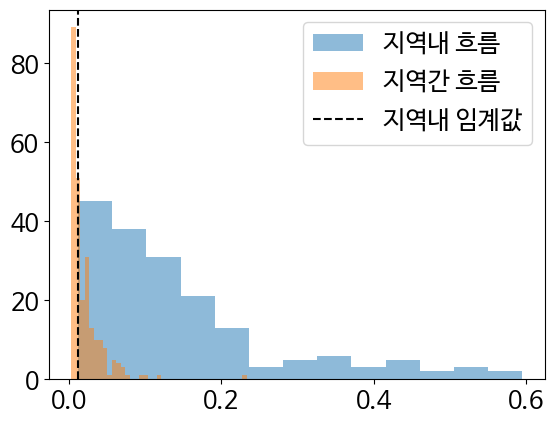

In [ ]:
def inflate(matrix):
    matrix = matrix ** 2
    return matrix / matrix.sum(axis=0)

flow_matrix = inflate(flow_matrix)
compare_flow_distributions()

## 19-29

지역내 평균 흐름: 0.159
지역간 평균 흐름: 0.004
최소 지역내 흐름은 약 0.001 입니다
541 개의 지역간 흐름이 임계값 안에 속합니다


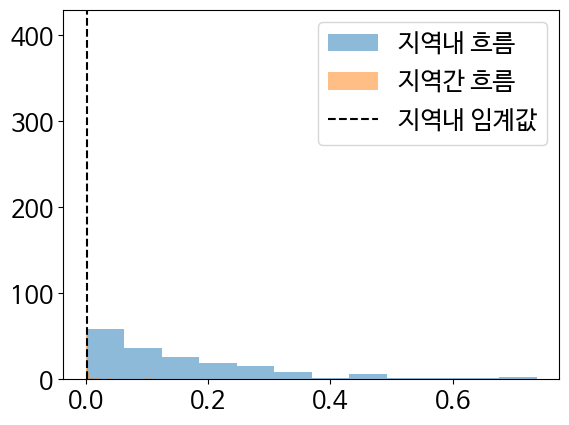

In [ ]:
flow_matrix = inflate(flow_matrix @ flow_matrix)
compare_flow_distributions()

## 19-30

In [ ]:
for _ in range(20):
    flow_matrix = inflate(flow_matrix @ flow_matrix)

## 19-31

In [ ]:
suspected_inter_county = [(i, j) for (i, j) in G.edges()
                        if not (flow_matrix[i][j] or flow_matrix[j][i])]
num_suspected = len(suspected_inter_county)
print(f"지역간 {num_suspected} 개의 엣지가 나타날 것으로 예상됩니다")

지역간 57 개의 엣지가 나타날 것으로 예상됩니다


## 19-32

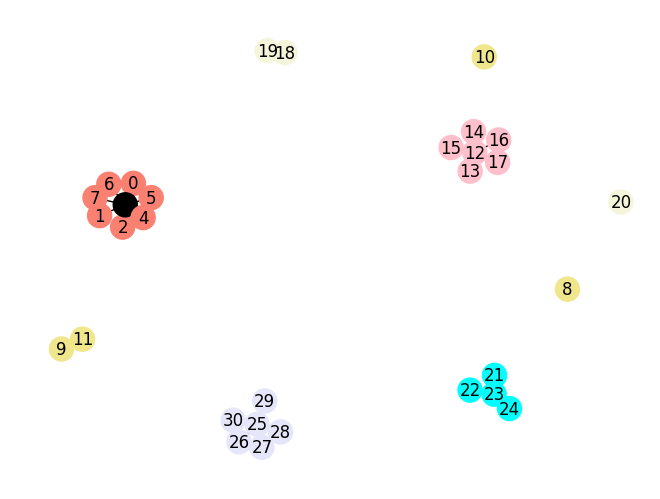

In [ ]:
np.random.seed(1)
G_copy = G.copy()
G_copy.remove_edges_from(suspected_inter_county)
nx.draw(G_copy, with_labels=True, node_color=node_colors)
plt.show()

## 19-33

In [ ]:
def compute_flow(adjacency_matrix):
    transaction_matrix = adjacency_matrix / adjacency_matrix.sum(axis=0)
    return (transaction_matrix @ transaction_matrix)[1][0]

M1 = np.array([[0, 1], [1, 0]])
M2 = np.array([[1, 1], [1, 1]])
flow1, flow2 = [compute_flow(M) for M in [M1, M2]]

print(f"셀프 루프 없는 A => B 흐름은 {flow1} 입니다")
print(f"셀프 루프 있는 A => B 흐름은 {flow2} 입니다")

셀프 루프 없는 A => B 흐름은 0.0 입니다
셀프 루프 있는 A => B 흐름은 0.5 입니다


## 19-34

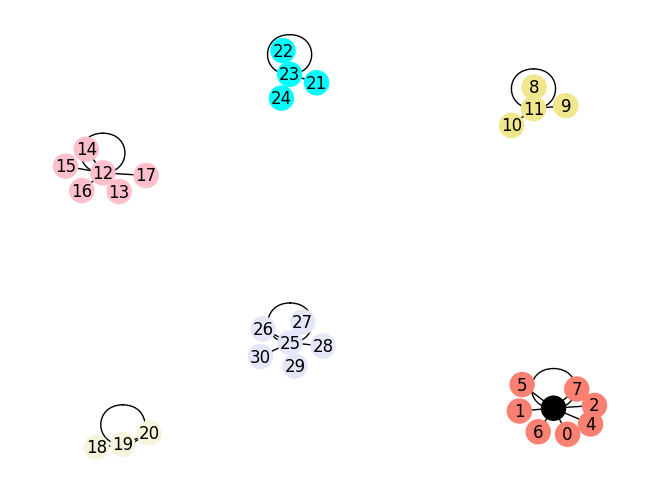

In [ ]:
def run_mcl(G):
    for i in G.nodes:
        G.add_edge(i, i)

    adjacency_matrix = nx.to_numpy_array(G)
    transition_matrix = adjacency_matrix / adjacency_matrix.sum(axis=0)
    flow_matrix = inflate(transition_matrix @ transition_matrix)

    for _ in range(20):
        flow_matrix = inflate(flow_matrix @ flow_matrix)

    G.remove_edges_from([(i, j) for i, j in G.edges()
                         if not (flow_matrix[i][j] or flow_matrix[j][i])])

G_copy = G.copy()
run_mcl(G_copy)
nx.draw(G_copy, with_labels=True, node_color=node_colors)
plt.show()

## 19-35

In [ ]:
component = nx.shortest_path_length(G_copy, source=0).keys()
county_id = G.nodes[0]['county_id']
for i in component:
    assert G.nodes[i]['county_id'] == county_id

print(f"지역 {county_id}에서 발견된 마을은 다음과 같습니다")
print(sorted(component))

지역 0에서 발견된 마을은 다음과 같습니다
[0, 1, 2, 3, 4, 5, 6, 7]


## 19-36

In [ ]:
for component in nx.connected_components(G_copy):
    county_id = G.nodes[list(component)[0]]['county_id']
    print(f"지역 {county_id}에서 발견된 마을은 다음과 같습니다")
    print(component)

지역 0에서 발견된 마을은 다음과 같습니다
{0, 1, 2, 3, 4, 5, 6, 7}
지역 1에서 발견된 마을은 다음과 같습니다
{8, 9, 10, 11}
지역 2에서 발견된 마을은 다음과 같습니다
{12, 13, 14, 15, 16, 17}
지역 3에서 발견된 마을은 다음과 같습니다
{18, 19, 20}
지역 4에서 발견된 마을은 다음과 같습니다
{24, 21, 22, 23}
지역 5에서 발견된 마을은 다음과 같습니다
{25, 26, 27, 28, 29, 30}


## 19-37

In [ ]:
!pip install markov_clustering

In [ ]:
from markov_clustering import get_clusters, run_mcl

## 19-38

In [ ]:
adjacency_matrix = nx.to_numpy_array(G)
clusters = get_clusters(run_mcl(adjacency_matrix))

for cluster in clusters:
    county_id = G.nodes[cluster[0]]['county_id']
    print(f"\n다음 마을들이 지역 {county_id}에서 발견되었습니다")
    print(cluster)


다음 마을들이 지역 0에서 발견되었습니다
(0, 1, 2, 3, 4, 5, 6, 7)

다음 마을들이 지역 1에서 발견되었습니다
(8, 9, 10, 11)

다음 마을들이 지역 2에서 발견되었습니다
(12, 13, 14, 15, 16, 17)

다음 마을들이 지역 3에서 발견되었습니다
(18, 19, 20)

다음 마을들이 지역 4에서 발견되었습니다
(21, 22, 23, 24)

다음 마을들이 지역 5에서 발견되었습니다
(25, 26, 27, 28, 29, 30)


## 19-39

In [ ]:
G_karate = nx.karate_club_graph()
print(G_karate.nodes(data=True))

[(0, {'club': 'Mr. Hi'}), (1, {'club': 'Mr. Hi'}), (2, {'club': 'Mr. Hi'}), (3, {'club': 'Mr. Hi'}), (4, {'club': 'Mr. Hi'}), (5, {'club': 'Mr. Hi'}), (6, {'club': 'Mr. Hi'}), (7, {'club': 'Mr. Hi'}), (8, {'club': 'Mr. Hi'}), (9, {'club': 'Officer'}), (10, {'club': 'Mr. Hi'}), (11, {'club': 'Mr. Hi'}), (12, {'club': 'Mr. Hi'}), (13, {'club': 'Mr. Hi'}), (14, {'club': 'Officer'}), (15, {'club': 'Officer'}), (16, {'club': 'Mr. Hi'}), (17, {'club': 'Mr. Hi'}), (18, {'club': 'Officer'}), (19, {'club': 'Mr. Hi'}), (20, {'club': 'Officer'}), (21, {'club': 'Mr. Hi'}), (22, {'club': 'Officer'}), (23, {'club': 'Officer'}), (24, {'club': 'Officer'}), (25, {'club': 'Officer'}), (26, {'club': 'Officer'}), (27, {'club': 'Officer'}), (28, {'club': 'Officer'}), (29, {'club': 'Officer'}), (30, {'club': 'Officer'}), (31, {'club': 'Officer'}), (32, {'club': 'Officer'}), (33, {'club': 'Officer'})]


## 19-40

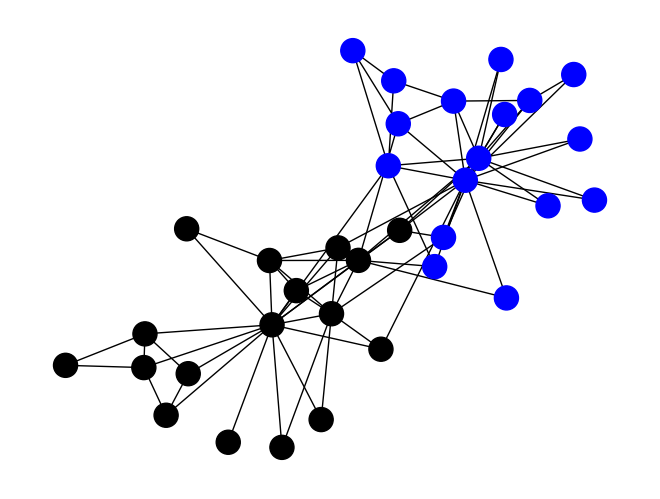

In [ ]:
np.random.seed(2)
club_to_color = {'Mr. Hi': 'k', 'Officer': 'b'}
node_colors = [club_to_color[G_karate.nodes[i]['club']] for i in G_karate]

nx.draw(G_karate, node_color=node_colors)
plt.show()

## 19-41

In [ ]:
adjacency_matrix = nx.to_numpy_array(G_karate)
clusters = get_clusters(run_mcl(adjacency_matrix))
for i, cluster in enumerate(clusters):
    print(f"그룹 {i}:\n{cluster}\n")


그룹 0:
(0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21)

그룹 1:
(8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33)

그룹 2:
(31,)



## 19-42

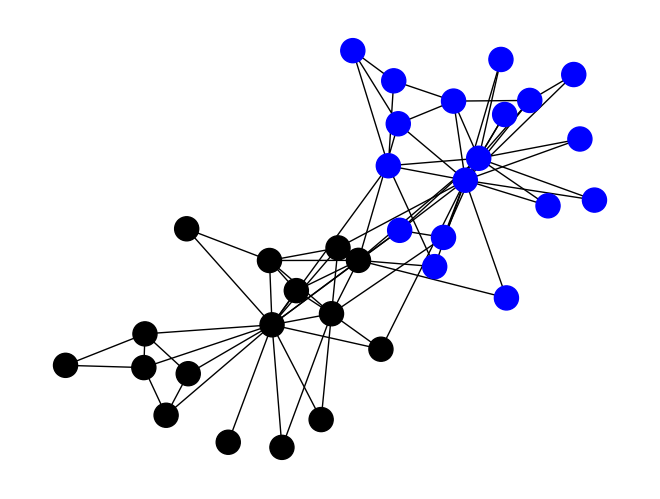

In [ ]:
np.random.seed(2)
cluster_0, cluster_1, _ = clusters
node_colors = ['k' if i in cluster_0 else 'b' for i in G_karate.nodes]
nx.draw(G_karate, node_color=node_colors)
plt.show()

## 19-43

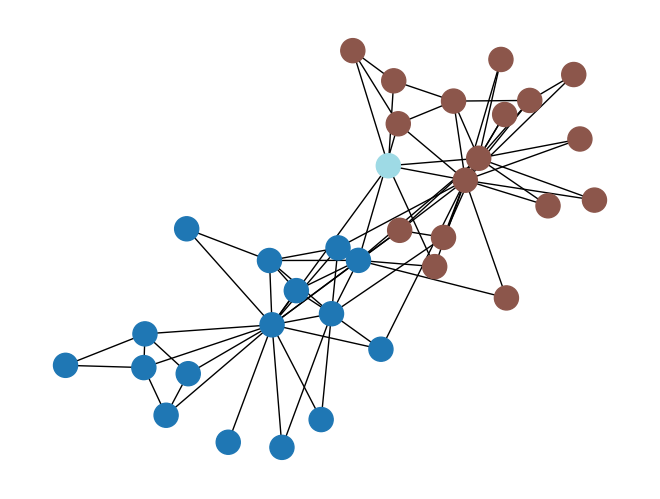

In [ ]:
np.random.seed(2)
for cluster_id, node_indices in enumerate(clusters):
    for i in node_indices:
        G_karate.nodes[i]['cluster_id'] = cluster_id

node_colors = [G_karate.nodes[n]['cluster_id'] for n in G_karate.nodes]
nx.draw(G_karate, node_color=node_colors, cmap=plt.cm.tab20)
plt.show()